In [27]:
import sys
sys.path.append('../libraries')

import custom_ODE_Solver

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time
import scipy
import sympy

MovieWriter ffmpeg unavailable; using Pillow instead.


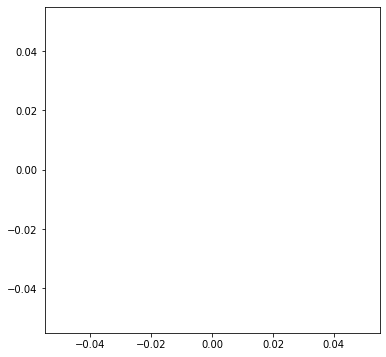

In [28]:
x0 = np.array([ 5, 0, np.pi/4, 1  ])
tf = 20
dt = 0.02
M = 4.5
m = 1

def derivs(t,x):
    r,pr,theta,p_theta = x
    dr = pr/(M+m)
    dpr = p_theta**2 / (m*r**3) - M*scipy.constants.g + m*scipy.constants.g*np.cos(theta)
    dtheta = p_theta / (m*r**2)
    dp_theta = -m*scipy.constants.g*r*np.sin(theta)
    return np.array([dr,dpr,dtheta,dp_theta])


path = custom_ODE_Solver.RK4(int(tf/dt),dt,x0,derivs)
r = path[:,0]
theta = path[:,2]
X = r*np.sin(theta); Y = -r*np.cos(theta)
fig,ax = plt.subplots(figsize=(6,6))
scat = ax.scatter(X[:0],Y[:0],s=2,c=np.arange(X[:0].size),cmap='rainbow')

def update(num, x, y, scat):
    data = np.stack([x[:num], y[:num]]).T
    scat.set_offsets(data)
    #scat.set_color(np.arange(x[:num].size))
    return scat,

test = animation.FuncAnimation(fig, update, len(X), interval=100, fargs=[X, Y, scat], blit=True)
test.save('test.gif', fps=60)